In [1]:
import os
import pandas as pd

import sklearn
from lightgbm import LGBMRegressor, LGBMClassifier
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

import matplotlib.pyplot as plt

In [2]:
# from get_prices import download_parquets
# download_parquets()

{'AA': ['2024_07_19.parquet'], 'INDA': ['2024_07_19.parquet'], 'EPI': ['2024_07_19.parquet'], 'HDB': ['2024_07_19.parquet']}
AA: ['2024_07_19.parquet']
File downloaded: ./prices; delete: 200
INDA: ['2024_07_19.parquet']
File downloaded: ./prices; delete: 200
EPI: ['2024_07_19.parquet']
File downloaded: ./prices; delete: 200
HDB: ['2024_07_19.parquet']
File downloaded: ./prices; delete: 200


In [3]:
assets = pd.read_csv('../src/data/assets.txt').columns.tolist()
assets

['AA', 'HDB', 'INDA', 'EPI']

In [4]:
os.listdir('./prices')

['AA_2024_07_12.parquet',
 'EPI_2024_07_12.parquet',
 'HDB_2024_07_12.parquet',
 'INDA_2024_07_12.parquet']

In [3]:
df = pd.read_parquet('./prices/HDB_2024_07_19.parquet')
df = df[df.marketState == 'REGULAR']
df = df.set_index('regularMarketTime')

In [4]:
df.columns

Index(['symbol', 'quoteType', 'marketState', 'regularMarketChangePercent',
       'regularMarketPrice', 'regularMarketChange', 'regularMarketOpen',
       'regularMarketDayHigh', 'regularMarketDayLow', 'regularMarketVolume',
       'bid', 'ask', 'bidSize', 'askSize', 'fiftyTwoWeekLowChange',
       'fiftyTwoWeekLowChangePercent', 'fiftyTwoWeekHighChange',
       'fiftyTwoWeekHighChangePercent', 'trailingPE', 'priceEpsCurrentYear',
       'fiftyDayAverageChange', 'fiftyDayAverageChangePercent',
       'twoHundredDayAverageChange', 'twoHundredDayAverageChangePercent',
       'marketCap', 'forwardPE', 'priceToBook'],
      dtype='object')

In [5]:
X = df.drop(['symbol', 'marketState', 'quoteType'], axis=1).shift(1).dropna(how='all', axis=0)
X

,regularMarketChangePercent,regularMarketPrice,regularMarketChange,regularMarketOpen,regularMarketDayHigh,regularMarketDayLow,regularMarketVolume,bid,ask,bidSize,...,fiftyTwoWeekHighChangePercent,trailingPE,priceEpsCurrentYear,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook
regularMarketTime,,,,,,,,,,,,,,,,,,,,,
2024-07-19 09:30:30Z,-0.099406,60.3000,-0.060001,60.48,60.860,60.0700,1146317.0,0.00,60.26,8.0,...,-0.155344,18.668730,22.500000,0.163200,0.002714,1.395199,0.023686,1.529232e+11,19.203821,0.100358
2024-07-19 09:31:28Z,-0.331676,60.1000,-0.200001,60.48,60.125,60.1000,24232.0,0.00,60.26,8.0,...,-0.158145,18.606810,22.425371,-0.036800,-0.000612,1.195198,0.020290,1.524160e+11,19.140127,0.100025
2024-07-19 09:32:51Z,-0.398006,60.0600,-0.239998,60.48,60.170,60.0600,31635.0,0.00,60.26,8.0,...,-0.158706,18.594427,22.410448,-0.076797,-0.001277,1.155201,0.019611,1.523146e+11,19.127388,0.099959
2024-07-19 09:33:41Z,-0.414594,60.0500,-0.250000,60.48,60.170,60.0000,42165.0,0.00,60.26,8.0,...,-0.158846,18.591331,22.406715,-0.086800,-0.001443,1.145199,0.019442,1.522892e+11,19.124203,0.099942
2024-07-19 09:34:20Z,-0.265340,60.1400,-0.160000,60.48,60.170,60.0000,43595.0,0.00,60.26,8.0,...,-0.157585,18.619194,22.440298,0.003201,0.000053,1.235199,0.020969,1.525174e+11,19.152864,0.100092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 15:54:56Z,-1.407372,59.4513,-0.848698,60.00,60.390,59.4131,1411616.0,59.45,59.46,13.0,...,-0.167232,18.405975,22.183321,-0.685497,-0.011399,0.546501,0.009278,1.507709e+11,18.933535,0.098946
2024-07-19 15:55:58Z,-1.391378,59.4610,-0.839001,60.00,60.390,59.4131,1429236.0,59.45,59.45,13.0,...,-0.167096,18.408978,22.186940,-0.675800,-0.011238,0.556198,0.009442,1.507955e+11,18.936623,0.098962
2024-07-19 15:56:56Z,-1.401439,59.4550,-0.844997,60.00,60.390,59.4131,1456800.0,59.44,59.45,13.0,...,-0.167180,18.407122,22.184702,-0.681797,-0.011337,0.550201,0.009341,1.507803e+11,18.934713,0.098952


In [6]:
y = df[['regularMarketChangePercent']].iloc[1:]
y

,regularMarketChangePercent
regularMarketTime,
2024-07-19 09:30:30Z,-0.331676
2024-07-19 09:31:28Z,-0.398006
2024-07-19 09:32:51Z,-0.414594
2024-07-19 09:33:41Z,-0.265340
2024-07-19 09:34:20Z,-0.199003
...,...
2024-07-19 15:54:56Z,-1.391378
2024-07-19 15:55:58Z,-1.401439
2024-07-19 15:56:56Z,-1.301824


In [7]:
lgbr = LGBMRegressor()
lgbr.fit(X[:300], y[:300])

In [8]:
lgbr.score(X[300:], y[300:])

-2.0317308081259715

In [9]:
y[300:].reset_index(drop=True)

,regularMarketChangePercent
0,-1.061359
1,-1.053153
2,-1.061359
3,-1.053065
4,-1.044778
...,...
84,-1.391378
85,-1.401439
86,-1.301824
87,-1.326699


In [10]:
y_pred = pd.Series(lgbr.predict(X[300:]), name='y_pred')
pd.concat([y_pred, y[300:].reset_index(drop=True)], axis=1)

,y_pred,regularMarketChangePercent
0,-1.037363,-1.061359
1,-1.037363,-1.053153
2,-1.037363,-1.061359
3,-1.033053,-1.053065
4,-1.037363,-1.044778
...,...,...
84,-1.040560,-1.391378
85,-1.040560,-1.401439
86,-1.040560,-1.301824
87,-1.040560,-1.326699


<Axes: >

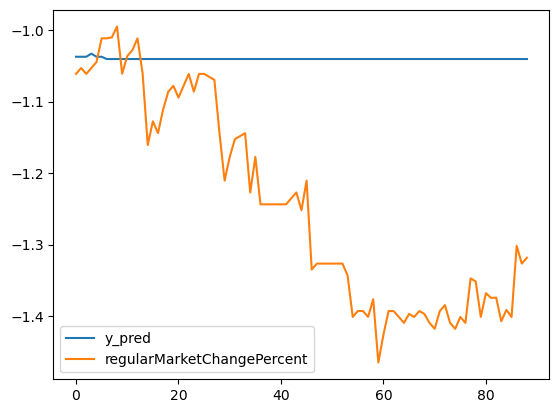

In [11]:
pd.concat([y_pred, y[300:].reset_index(drop=True)], axis=1).plot()

C:\Users\shubh\miniconda3\envs\ibstock\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (1440) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-994.922, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-994.447, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-995.612, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-996.025, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-998.987, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1006.640, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1008.261, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1006.800, Time=0.48 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1004.831, Time=0.78 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1008.734, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-995.431, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-1007.411, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1007.239, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-999.198, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0]   

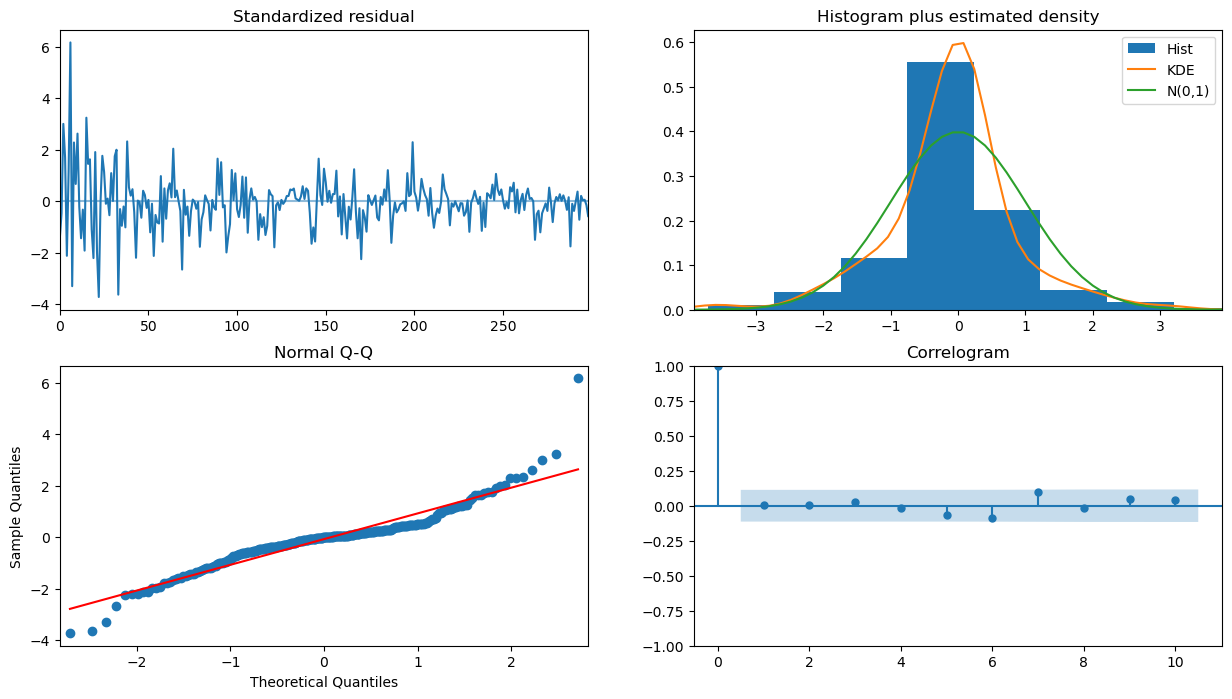

In [12]:
model_autoARIMA = auto_arima(y[:300], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=60*24,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

C:\Users\shubh\AppData\Local\Temp\ipykernel_2676\630787423.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  X.index = pd.to_datetime(X.index).to_period('min')
C:\Users\shubh\AppData\Local\Temp\ipykernel_2676\630787423.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  y.index = pd.to_datetime(y.index).to_period('min')
C:\Users\shubh\miniconda3\envs\ibstock\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


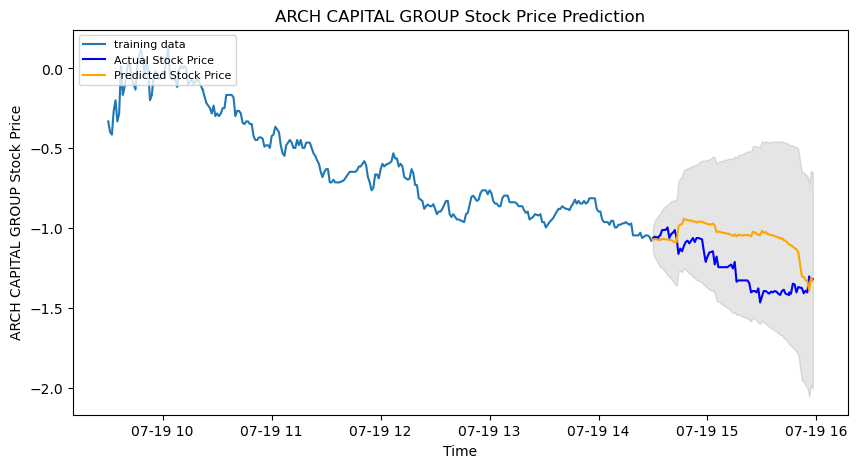

In [14]:
X.index = pd.to_datetime(X.index).to_period('min')
y.index = pd.to_datetime(y.index).to_period('min')
model = ARIMA(y[:300], order=(2,1,0), exog=X[:300])  
fitted = model.fit()
ff = fitted.get_forecast(len(y[300:]), exog=X[300:])  # 95% conf
fc, se, conf = ff.predicted_mean, ff.se_mean, ff.conf_int()

# Make as pandas series
fc_series = pd.Series(fc, index=y[300:].index)
lower_series = pd.Series(conf.iloc[:, 0], index=y[300:].index)
upper_series = pd.Series(conf.iloc[:, 1], index=y[300:].index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
y.index = y.index.to_timestamp()
fc_series.index = fc_series.index.to_timestamp()
plt.plot(y[:300], label='training data')
plt.plot(y[300:], color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index.to_timestamp(), lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [28]:
pd.concat([fc.reset_index(drop=True), y[300:].reset_index(drop=True)], axis=1).head(50)

,predicted_mean,regularMarketChangePercent
0,0.403916,0.381299
1,0.397165,0.397881
2,0.408001,0.414456
3,0.409245,0.397881
4,0.407391,0.389590
5,0.394575,0.414456
6,0.403390,0.414388
7,0.405887,0.331566
8,0.384608,0.356433
9,0.389312,0.331566


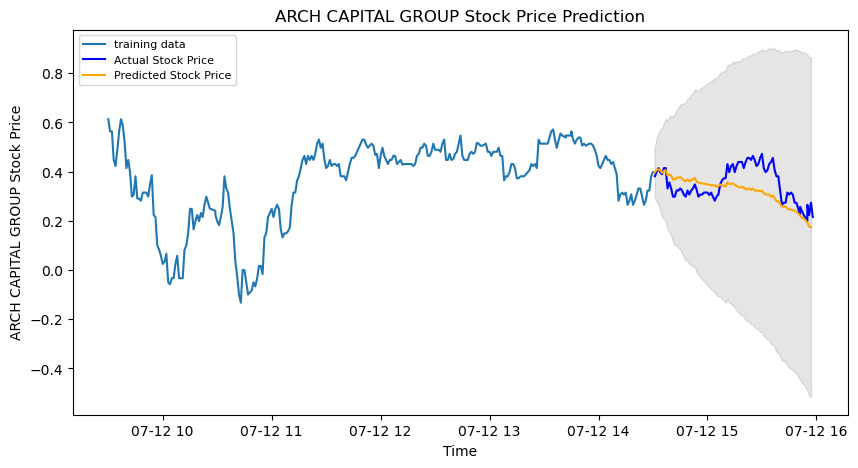

In [23]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(y[:300], label='training data')
plt.plot(y[300:], color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index.to_timestamp(), lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()